# Veri Setini Okuma
**Pandas kütüphanesini kullanarak veri seti okundu. head() metoduyla ilk 5 veri gösterildi **


In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#reading dataset and assign to df
df = pd.read_csv('/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv')
df.head() #display first 5 data




,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom



# "NaN" veri oluşturma
*****

add_random_missing_values() fonksiyonu kullanılarak NaN değerler oluşturuldu ve datasete eklendi.

In [5]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing
#create NaN values 
df= add_random_missing_values(dataframe= df)

# Veriyi Tanıma


In [6]:
print(df.columns) #display column names
print(type(df.columns)) #display type of data of columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [7]:
df.info() #display detailed info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  510036 non-null  object 
 1   Date           510191 non-null  object 
 2   ProductNo      510103 non-null  object 
 3   ProductName    510195 non-null  object 
 4   Price          510155 non-null  float64
 5   Quantity       510287 non-null  float64
 6   CustomerNo     510083 non-null  float64
 7   Country        510424 non-null  object 
dtypes: float64(3), object(5)
memory usage: 32.7+ MB


In [8]:
df_categorical = [] 
df_numeric = []
#seperate numeric and categorical data into lists 
for col in df.columns:
    if df[col].dtype =='object' or df[col].dtype == 'categorical':
        df_categorical.append(col)
    else:
        df_numeric.append(col)
        
print(df_categorical) #display categoric ones
print(df_numeric) #display numeric ones

['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Country']
['Price', 'Quantity', 'CustomerNo']


In [9]:
#display first 10 sells from German
filtered_df = df[df['Country']=='Germany'] 
filtered_df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
914,581494,12/9/2019,23084,Rabbit Night Light,NaN,24.0,12518.0,Germany
915,581494,12/9/2019,21559,Strawberry Lunch Box With Cutlery,6.19,6.0,12518.0,Germany
916,581494,12/9/2019,21506,Fancy Font Birthday Card,6.19,12.0,12518.0,Germany
917,581494,12/9/2019,22716,Card Circus Parade,6.19,12.0,12518.0,Germany
918,581494,12/9/2019,22556,Plasters In Tin Circus Parade,6.19,12.0,12518.0,Germany
919,581494,12/9/2019,22328,Round Snack Boxes Set Of 4 Fruits,6.19,6.0,12518.0,Germany
920,581494,12/9/2019,22730,Alarm Clock Bakelike Ivory,6.19,4.0,12518.0,Germany
922,581494,12/9/2019,22326,Round Snack Boxes Set Of4 Woodland,6.19,6.0,12518.0,Germany
923,581494,12/9/2019,NaN,Mini Funky Design Tapes,6.19,20.0,12518.0,Germany
924,581494,12/9/2019,23367,Set 12 Colour Pencils Spaceboy,6.19,24.0,12518.0,Germany


In [10]:
df['Country'].unique() #displays from which countries have been sales 

array(['United Kingdom', nan, 'Norway', 'Belgium', 'Germany', 'France',
       'Austria', 'Netherlands', 'EIRE', 'USA', 'Channel Islands',
       'Iceland', 'Portugal', 'Spain', 'Finland', 'Italy', 'Greece',
       'Japan', 'Sweden', 'Denmark', 'Cyprus', 'Malta', 'Switzerland',
       'Australia', 'Czech Republic', 'Poland', 'Hong Kong', 'Singapore',
       'RSA', 'Israel', 'Unspecified', 'United Arab Emirates', 'Canada',
       'European Community', 'Bahrain', 'Brazil', 'Saudi Arabia',
       'Lebanon', 'Lithuania'], dtype=object)

In [11]:
df.describe() #display statistics of each numeric column
              

,Price,Quantity,CustomerNo
count,510155.000000,510287.000000,510083.000000
mean,12.656345,9.915679,15227.931791
std,8.286363,221.910013,1716.651167
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13808.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


# Eksik Veri Analizi


In [12]:
#shows number of nulls for each column
print('# of null values\n',df.isna().sum())  

#shows number of not-null values for each column
print('# of not-null values','\n',df.notnull().sum()) 

#Sum of null values of each column
print('Sum of null values:',df.isna().sum().sum(),
      '\nSum of not-null values:',df.notnull().sum().sum())




# of null values
 TransactionNo    26314
Date             26159
ProductNo        26247
ProductName      26155
Price            26195
Quantity         26063
CustomerNo       26267
Country          25926
dtype: int64
# of not-null values 
 TransactionNo    510036
Date             510191
ProductNo        510103
ProductName      510195
Price            510155
Quantity         510287
CustomerNo       510083
Country          510424
dtype: int64
Sum of null values: 209326 
Sum of not-null values: 4081474


In [13]:
df[df.isna().any(axis=1)] #displays rows that have at least 1 NaN value

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
2,581475,12/9/2019,NaN,Storage Tin Vintage Leaf,11.53,12.0,13069.0,NaN
4,581475,12/9/2019,NaN,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom
5,581475,12/9/2019,21705,NaN,10.65,24.0,13069.0,United Kingdom
10,581475,12/9/2019,22380,Toy Tidy Spaceboy,11.06,20.0,13069.0,NaN
17,NaN,12/9/2019,23141,Triple Wire Hook Pink Heart,11.06,12.0,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536340,C536548,12/1/2018,22654,Deluxe Sewing Kit,16.35,-1.0,NaN,Germany
536345,C536548,NaN,22168,Organiser Wood Antique White,18.96,-2.0,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3.0,NaN,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4.0,NaN,Germany


In [14]:
df.duplicated(keep= False) #all duplicates marks as True

0         False
1         False
2         False
3         False
4         False
          ...  
536345    False
536346    False
536347    False
536348    False
536349    False
Length: 536350, dtype: bool

In [15]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates) #To see which ones are duplicate

       TransactionNo       Date ProductNo                       ProductName  \
1350          581538  12/9/2019     22992             Revolver Wooden Ruler   
1354          581538  12/9/2019     22694                       Wicker Star   
1356          581538  12/9/2019     23275  Set Of 3 Hanging Owls Ollie Beak   
1365          581538  12/9/2019     23275  Set Of 3 Hanging Owls Ollie Beak   
1401          581538  12/9/2019     22992             Revolver Wooden Ruler   
...              ...        ...       ...                               ...   
535227        536559  12/1/2018    51014L            Feather Pen Light Pink   
535305        536569  12/1/2018     22111      Scottie Dog Hot Water Bottle   
535310        536569  12/1/2018     22111      Scottie Dog Hot Water Bottle   
536189        536528  12/1/2018     22839   3 Tier Cake Tin Green And Cream   
536190        536528  12/1/2018     22839   3 Tier Cake Tin Green And Cream   

        Price  Quantity  CustomerNo         Country

<Axes: >

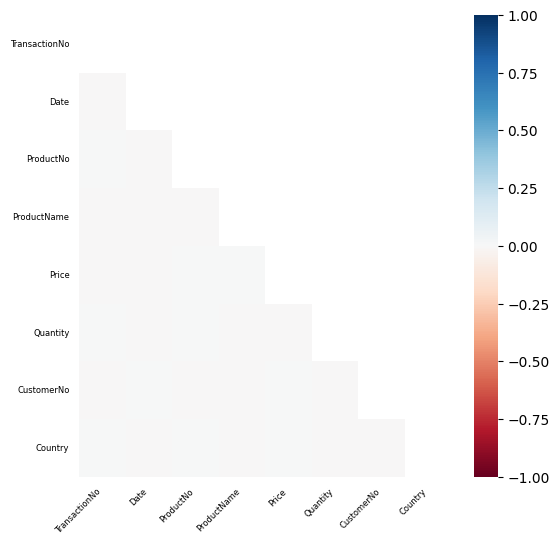

In [16]:
import missingno as msno
# To see in which columns the missing values are relational.
#If it is closer to 1, it means it is significant; if it is closer to 0, it means less important 
msno.heatmap(df,figsize = (6,6),fontsize = 6)

<Axes: >

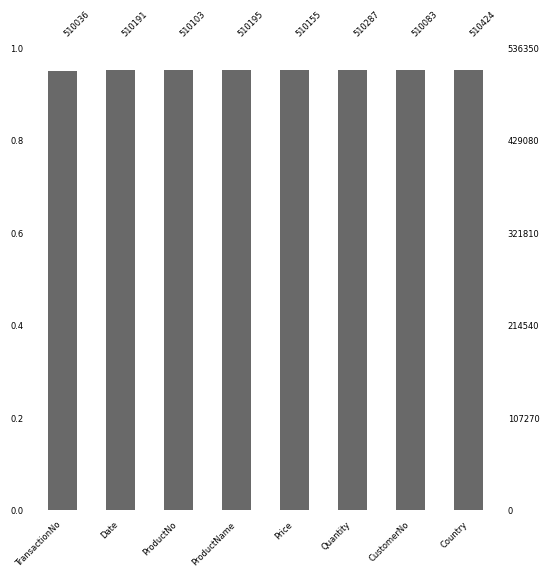

In [17]:
msno.bar(df,figsize=(6,6),fontsize=6) # To see in which columns the missing values are relational.

<Axes: >

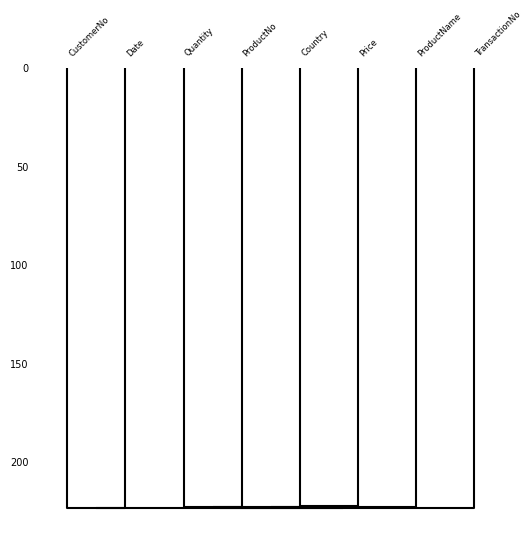

In [18]:
msno.dendrogram(df,figsize=(6,6),fontsize=6)

In [19]:
df[df.isna().all(axis=1)] #To see rows where all values are empty 

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [20]:
#Display rows where its productno is empty
missing_productno = df[df['ProductNo'].isna()]
print("ProductNo sütunu boş olan satırlar:")
print(missing_productno)

ProductNo sütunu boş olan satırlar:
       TransactionNo       Date ProductNo                        ProductName  \
2             581475  12/9/2019       NaN           Storage Tin Vintage Leaf   
4             581475  12/9/2019       NaN  Set Of 4 Knick Knack Tins Poppies   
29            581476        NaN       NaN       Travel Card Wallet Transport   
138           581482  12/9/2019       NaN                   Kings Choice Mug   
141           581482  12/9/2019       NaN       Baking Set 9 Piece Retrospot   
...              ...        ...       ...                                ...   
536245        536592  12/1/2018       NaN           Home Building Block Word   
536259        536544  12/1/2018       NaN       French Lattice Cushion Cover   
536271        536592  12/1/2018       NaN        Blue Happy Birthday Bunting   
536273        536592  12/1/2018       NaN       Cream Sweetheart Letter Rack   
536292        536393  12/1/2018       NaN                     Retrospot Lamp   

   

In [21]:
#Display columns whose datatype is object
df_categorical = df.select_dtypes(include = "object")
df_categorical.head()

,TransactionNo,Date,ProductNo,ProductName,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,United Kingdom
2,581475,12/9/2019,NaN,Storage Tin Vintage Leaf,NaN
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,United Kingdom
4,581475,12/9/2019,NaN,Set Of 4 Knick Knack Tins Poppies,United Kingdom


In [22]:
#To see how many features categorical values have
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 23015 unique values in "TransactionNo" categorical feature.

There are 305 unique values in "Date" categorical feature.

There are 3760 unique values in "ProductNo" categorical feature.

There are 3766 unique values in "ProductName" categorical feature.

There are 38 unique values in "Country" categorical feature.



In [23]:
#Displays how many values that columns have
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

TransactionNo
573585     1047
581219      713
581492      693
580729      684
558475      663
           ... 
C543442       1
549925        1
C561237       1
543348        1
C558249       1
Name: count, Length: 23015, dtype: int64
 *********************************************
Date
12/5/2019     5038
12/8/2019     4703
11/29/2019    4095
11/16/2019    3973
11/11/2019    3869
              ... 
3/13/2019      508
12/19/2018     487
5/1/2019       426
12/22/2018     274
2/6/2019       267
Name: count, Length: 305, dtype: int64
 *********************************************
ProductNo
85123A    2270
22423     2101
85099B    2031
47566     1651
20725     1541
          ... 
21414        1
85065        1
22351        1
23605        1
20957        1
Name: count, Length: 3760, dtype: int64
 *********************************************
ProductName
Cream Hanging Heart T-Light Holder    2269
Regency Cakestand 3 Tier              2098
Jumbo Bag Red Retrospot               2067
Party Bunting      

In [24]:
#Getting copy of the df for filling the Country by getting its mode
df_copy= df.copy()
country = df_copy['Country'].mode()
df_copy['Country'] = df_copy['Country'].fillna(value = country[0])
df_copy.isna().sum() #Check null values of Country

TransactionNo    26314
Date             26159
ProductNo        26247
ProductName      26155
Price            26195
Quantity         26063
CustomerNo       26267
Country              0
dtype: int64

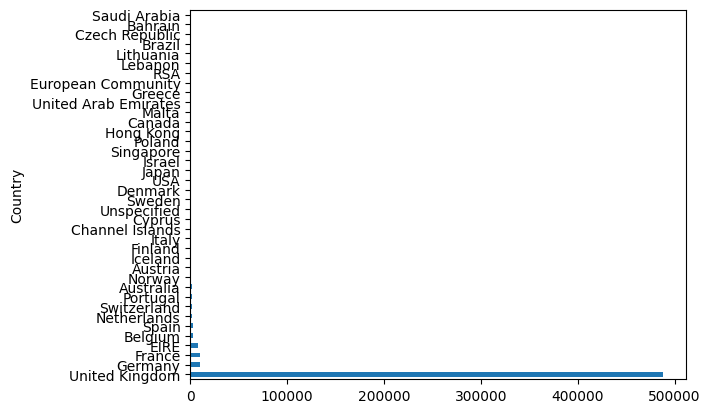

In [25]:
df_copy['Country'].value_counts().plot.barh();

In [26]:
df_copy['Date'][30:] #Display dates to analyze and fill the null values

30        12/9/2019
31        12/9/2019
32        12/9/2019
33        12/9/2019
34        12/9/2019
            ...    
536345          NaN
536346    12/1/2018
536347    12/1/2018
536348    12/1/2018
536349    12/1/2018
Name: Date, Length: 536320, dtype: object

In [27]:
#Since dates are in reverse order, fill null values by next value 
df_copy['Date']= df_copy['Date'].replace('',None).ffill()
df_copy['Date'][50:]

50        12/9/2019
51        12/9/2019
52        12/9/2019
53        12/9/2019
54        12/9/2019
            ...    
536345    12/1/2018
536346    12/1/2018
536347    12/1/2018
536348    12/1/2018
536349    12/1/2018
Name: Date, Length: 536300, dtype: object

In [28]:
df_copy['CustomerNo'][50:] #Display CustomerNo to analyze data

50        12433.0
51            NaN
52        12433.0
53        12433.0
54        12433.0
           ...   
536345    12472.0
536346        NaN
536347    12472.0
536348        NaN
536349    12472.0
Name: CustomerNo, Length: 536300, dtype: float64

In [29]:
#Since it is not possible to make logic about customer no,
#fill null values by looking at the next one
df_copy['CustomerNo']= df_copy['CustomerNo'].replace('',None).ffill()

In [30]:
print(df_copy['CustomerNo'][:50]) #Check if it works

0     17490.0
1     13069.0
2     13069.0
3     13069.0
4     13069.0
5     13069.0
6     13069.0
7     13069.0
8     13069.0
9     13069.0
10    13069.0
11    13069.0
12    13069.0
13    13069.0
14    13069.0
15    13069.0
16    13069.0
17    13069.0
18    13069.0
19    13069.0
20    12433.0
21    12433.0
22    12433.0
23    12433.0
24    12433.0
25    12433.0
26    12433.0
27    12433.0
28    12433.0
29    12433.0
30    12433.0
31    12433.0
32    12433.0
33    12433.0
34    12433.0
35    12433.0
36    12433.0
37    12433.0
38    12433.0
39    12433.0
40    12433.0
41    12433.0
42    12433.0
43    12433.0
44    12433.0
45    12433.0
46    12433.0
47    12433.0
48    12433.0
49    12433.0
Name: CustomerNo, dtype: float64


In [31]:
df_copy.isna().sum() #Display sum of null values

TransactionNo    26314
Date                 0
ProductNo        26247
ProductName      26155
Price            26195
Quantity         26063
CustomerNo           0
Country              0
dtype: int64

In [32]:
# Fill ProductName by looking their product no  
df_copy["ProductName"] = df_copy["ProductName"].fillna(
    value = df_copy.groupby("ProductNo")["ProductName"].transform('first'))

In [33]:
#If product no is empty, fill product no by look their product name
df_copy["ProductNo"] = df_copy["ProductNo"].fillna(
    value = df_copy.groupby("ProductName")["ProductNo"].transform('first'))

In [34]:
df_copy.isna().sum() #Display sum of null values, there is still a null values in product name and product no 

TransactionNo    26314
Date                 0
ProductNo         1285
ProductName       1279
Price            26195
Quantity         26063
CustomerNo           0
Country              0
dtype: int64

In [35]:
df_copy[df_copy["ProductNo"].isna()] #Display null values of product no

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
893,581492,12/9/2019,NaN,NaN,6.19,3.0,15492.0,United Kingdom
1686,581217,12/8/2019,NaN,NaN,6.19,6.0,16217.0,United Kingdom
1834,581217,12/8/2019,NaN,NaN,6.19,1.0,16217.0,United Kingdom
2474,581219,12/8/2019,NaN,NaN,NaN,1.0,16219.0,United Kingdom
2906,581219,12/8/2019,NaN,NaN,6.19,3.0,16219.0,United Kingdom
...,...,...,...,...,...,...,...,...
532968,536838,12/2/2018,NaN,NaN,10.68,24.0,14865.0,United Kingdom
533650,536404,12/1/2018,NaN,NaN,5.97,10.0,16218.0,United Kingdom
534703,536544,12/1/2018,NaN,NaN,11.12,1.0,17544.0,United Kingdom
534711,536544,12/1/2018,NaN,NaN,11.95,3.0,17544.0,United Kingdom


In [36]:
#Fill price by look their product no
df_copy["Price"] = df_copy["Price"].fillna(
    value = df_copy.groupby("ProductNo")["Price"].transform('first'))

In [37]:
df_copy[df_copy['Price'].isna()] #Display sum of null values of price

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
2474,581219,12/8/2019,NaN,NaN,NaN,1.0,16219.0,United Kingdom
8934,C581117,12/7/2019,NaN,NaN,NaN,-3.0,16393.0,United Kingdom
26802,579694,11/30/2019,NaN,NaN,NaN,2.0,14694.0,United Kingdom
32037,579508,11/29/2019,NaN,NaN,NaN,1.0,12508.0,United Kingdom
36653,578858,11/27/2019,NaN,NaN,NaN,2.0,18145.0,United Kingdom
...,...,...,...,...,...,...,...,...
508753,538593,12/13/2018,NaN,NaN,NaN,24.0,16701.0,United Kingdom
512854,538327,12/10/2018,NaN,NaN,NaN,6.0,15514.0,United Kingdom
521211,537641,12/7/2018,21410,Country Cottage Doorstop Green,NaN,1.0,13641.0,United Kingdom
526029,537441,12/6/2018,NaN,NaN,NaN,6.0,13564.0,United Kingdom


In [38]:
#If both, product no and product name is empty, fill product name by look their most repeated price.
#If there is more than 1 mode, take the first one
price_mode = df_copy.groupby('Price')['ProductName'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df_copy['ProductName'] = df_copy['ProductName'].fillna(df_copy['Price'].map(price_mode))


In [39]:
#If both, product no and product name is empty, fill product no by look their most repeated price.
#If there is more than 1 mode, take the first one
df_copy['ProductNo'] = df_copy['ProductNo'].fillna(df_copy['Price'].map(price_mode))


In [40]:
df_copy.isna().sum() #Display sum of null values, there is still a null values in product name and product no 

TransactionNo    26314
Date                 0
ProductNo           59
ProductName         58
Price               62
Quantity         26063
CustomerNo           0
Country              0
dtype: int64

In [41]:
df_copy[df_copy["ProductNo"].isna()] #Display null values of product no

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
2474,581219,12/8/2019,NaN,NaN,NaN,1.0,16219.0,United Kingdom
8934,C581117,12/7/2019,NaN,NaN,NaN,-3.0,16393.0,United Kingdom
26802,579694,11/30/2019,NaN,NaN,NaN,2.0,14694.0,United Kingdom
32037,579508,11/29/2019,NaN,NaN,NaN,1.0,12508.0,United Kingdom
36653,578858,11/27/2019,NaN,NaN,NaN,2.0,18145.0,United Kingdom
69347,576847,11/16/2019,NaN,NaN,NaN,96.0,17017.0,United Kingdom
70677,576406,11/15/2019,NaN,NaN,NaN,NaN,13692.0,United Kingdom
75704,576329,11/14/2019,NaN,NaN,NaN,3.0,15329.0,United Kingdom
84685,575516,11/10/2019,NaN,NaN,NaN,12.0,17340.0,United Kingdom
91030,574965,11/8/2019,NaN,NaN,NaN,1.0,17964.0,United Kingdom


In [42]:
#Get mean of quantity to fill null values
quantity = df_copy['Quantity'].mean()
df_copy['Quantity']= df_copy['Quantity'].fillna(value = quantity)
df_copy.isna().sum()

TransactionNo    26314
Date                 0
ProductNo           59
ProductName         58
Price               62
Quantity             0
CustomerNo           0
Country              0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


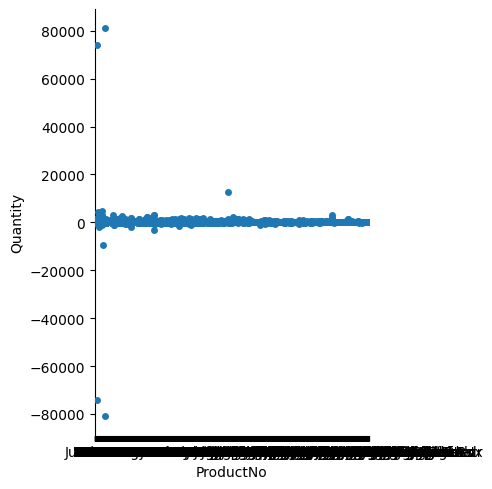

In [43]:
import seaborn as sns
sns.catplot(data = df_copy,
            x = "ProductNo",
            y = "Quantity");

In [44]:
df_copy['TransactionNo'][50:100]                        

50    581476
51    581476
52    581476
53    581476
54    581476
55    581476
56    581476
57    581476
58    581476
59       NaN
60    581476
61    581476
62    581476
63    581476
64    581476
65    581476
66    581476
67    581476
68    581476
69    581476
70    581476
71    581476
72    581476
73    581476
74    581476
75    581476
76    581476
77    581476
78    581476
79    581476
80    581476
81    581476
82    581476
83       NaN
84    581477
85    581477
86       NaN
87    581477
88       NaN
89    581477
90    581477
91    581477
92    581477
93    581477
94    581478
95    581478
96    581478
97    581478
98    581478
99    581478
Name: TransactionNo, dtype: object

In [45]:
#Fill null values by replacing them with the previous value
df_copy['TransactionNo']= df_copy['TransactionNo'].replace('',None).bfill()

In [46]:
df_copy.isna().sum() #Check null values

TransactionNo     0
Date              0
ProductNo        59
ProductName      58
Price            62
Quantity          0
CustomerNo        0
Country           0
dtype: int64

# Kategorik ve Numerik Veri Analizi

* Her ülke (Country) için en çok satın alınan ürünü (ProductName) bulur ve bu bilgiyi yeni bir veri çerçevesine (df_product) ekler.
* İlk olarak, groupby ile Country bazında gruplama yapılır ve her grubun mod değeri (en sık tekrar eden ürün) hesaplanır.
* Daha sonra, sonuçlar bir veri çerçevesi olarak düzenlenir ve ProductName sütunu, MostPurchasedProduct olarak yeniden adlandırılır.
* Sonuç olarak, df_product veri çerçevesi, ülkeler ve her ülkenin en çok satın alınan ürünlerini içerir.

In [76]:

# Find the most purchased item in countries
product_name_mode = (
    df_copy.groupby('Country')['ProductName']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

# Create a new df including Country and Product
df_product = product_name_mode.rename(columns={'ProductName': 'MostPurchasedProduct'})
df_product

,Country,MostPurchasedProduct
0,Australia,Party Bunting
1,Austria,Dolly Girl Lunch Box
2,Bahrain,Novelty Biscuits Cake Stand 3 Tier
3,Belgium,Round Snack Boxes Set Of4 Woodland
4,Brazil,Clock Magnet Mum's Kitchen
5,Canada,Colouring Pencils Brown Tube
6,Channel Islands,Doormat Welcome To Our Home
7,Cyprus,Regency Cakestand 3 Tier
8,Czech Republic,Jigsaw Tree With Birdhouse
9,Denmark,Dolly Girl Lunch Box


* Çok fazla veri olduğu için yalnızca en fazla işlem yapılan ilk 50 işlem numarası (TransactionNo) filtrelenir.
* CustomerNo ve TransactionNo sütunları kullanılarak, her müşterinin her işlemde satın aldığı toplam ürün miktarı (Quantity) hesaplanır.
* sns.barplot kullanılarak, işlem numarasına (TransactionNo) göre satın alınan ürün miktarları görselleştirilir.
* Sonuç olarak, müşterilerin işlem bazında satın aldıkları ürün miktarlarını karşılaştıran bir bar grafiği elde edilir.

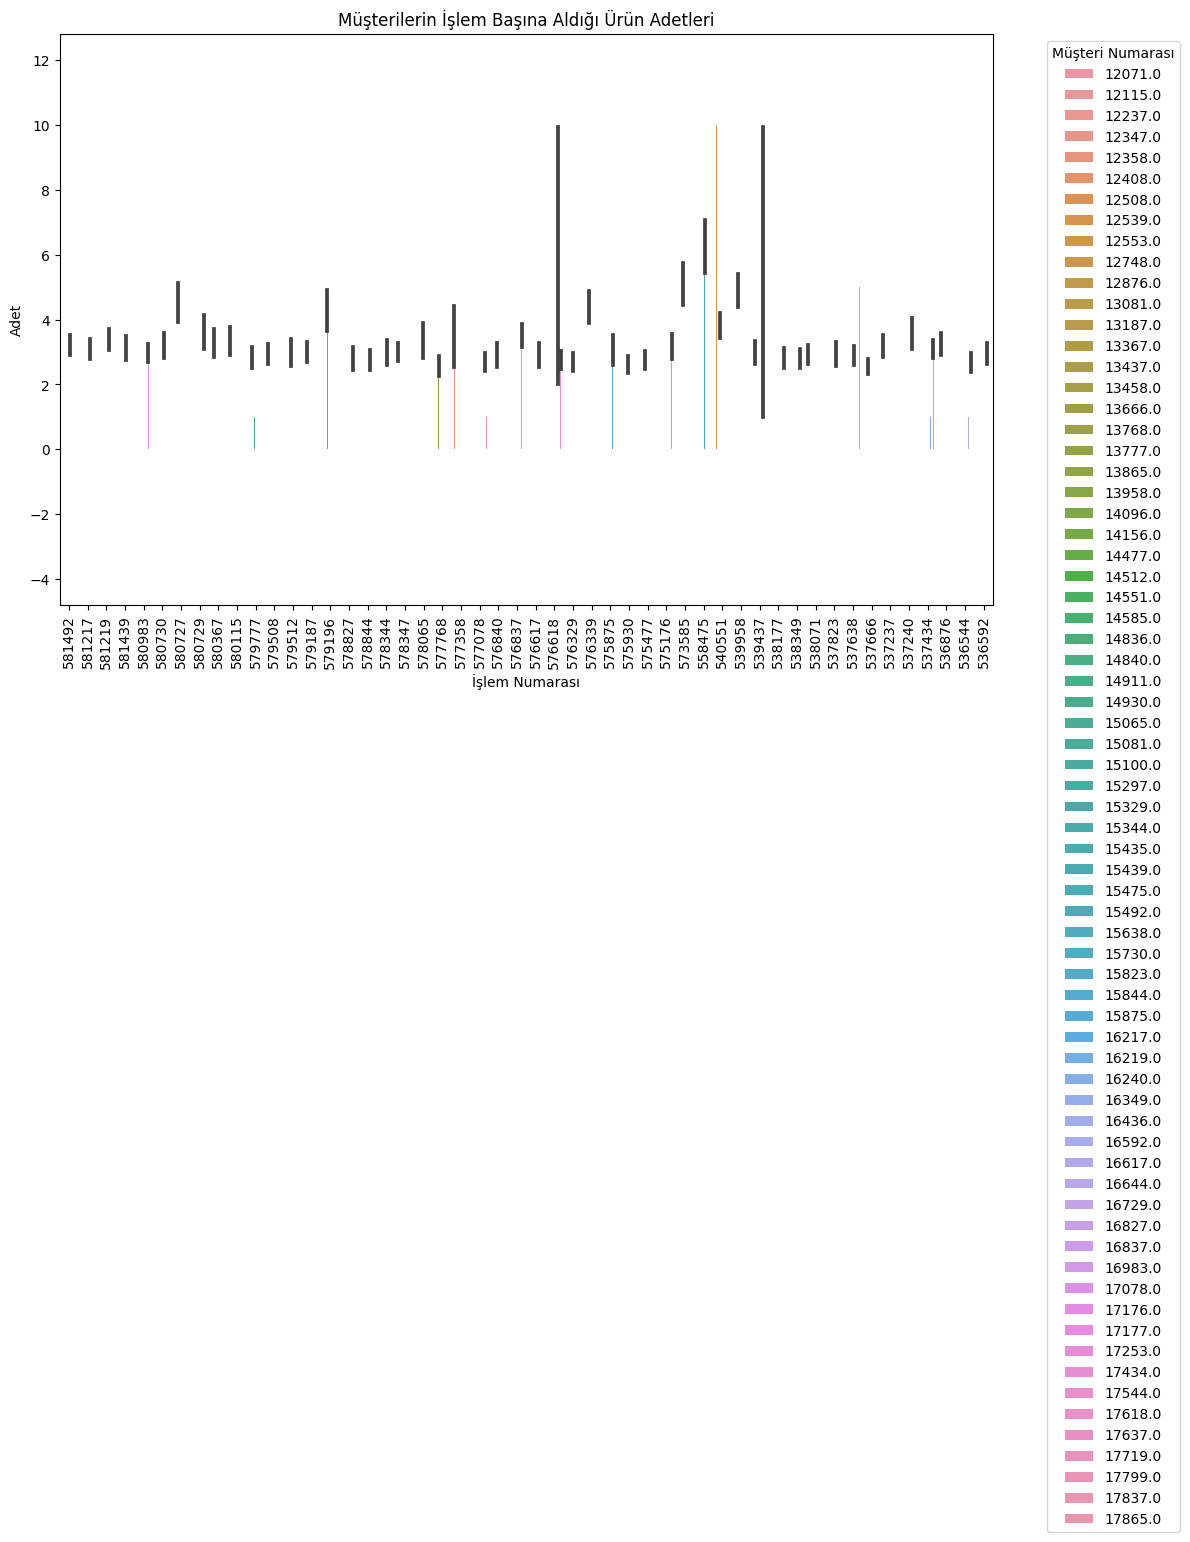

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12))
plt.xticks(rotation = 90)

#Since there are lots of data,filter transactions to top50 transactionNo
top_transactions = df_copy['TransactionNo'].value_counts().head(50).index
df_filtered = df_copy[df_copy['TransactionNo'].isin(top_transactions)]

#Group Customer No and Transaction No for display how many product purchased in each transaction by a customer. 
summary_df = df_copy.groupby(['CustomerNo', 'TransactionNo'])['Quantity'].sum().reset_index()
sns.barplot(data= df_filtered, x='TransactionNo', y='Quantity', hue='CustomerNo')

plt.title('Müşterilerin İşlem Başına Aldığı Ürün Adetleri')
plt.xlabel('İşlem Numarası')
plt.ylabel('Adet')
plt.legend(title='Müşteri Numarası', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* ProductName sütununda en çok satın alınan ilk 20 ürün (top_products) belirlenir ve veri yalnızca bu ürünlerle sınırlandırılır.
* Date sütunu datetime formatına çevrilir, böylece tarih bazlı işlemler yapılabilir.
* Kullanıcının belirttiği başlangıç ve bitiş tarihleri (start_date ve end_date) kullanılarak veri filtrelenir.
* groupby ile her gün (Date) ve ürün adı (ProductName) için toplam satın alınan ürün miktarı (Quantity) hesaplanır.
* sns.barplot kullanılarak, tarihe göre en çok satın alınan 20 ürünün günlük satış miktarları gösterilir.
* Bu grafik, belirlenen tarih aralığında en popüler 20 ürünün günlük satış miktarlarını ve bu ürünlerin satış trendlerini görselleştirir.

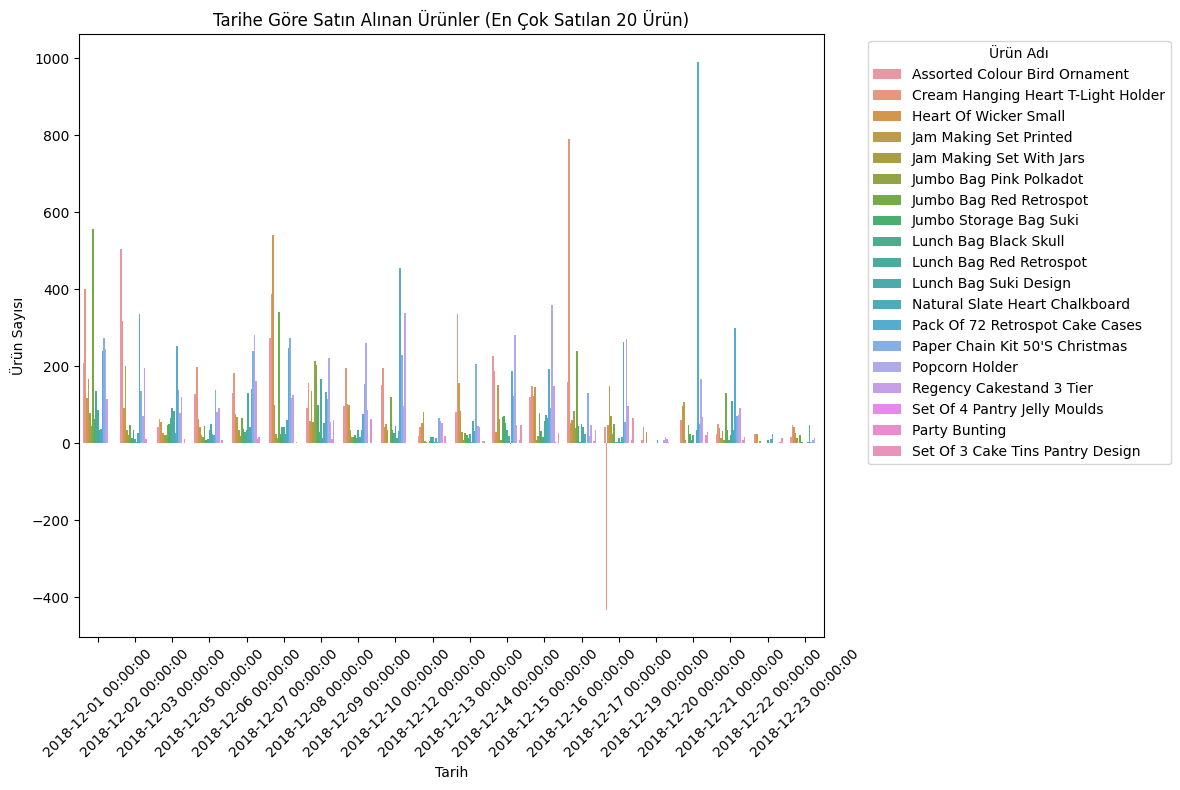

In [58]:
#Since there are lots of data, filter top 20 products
top_products = df_copy['ProductName'].value_counts().head(20).index
filtered_df = df_copy[df_copy['ProductName'].isin(top_products)]

#Convert object type to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Assign start and end dates 
start_date = '1/1/2018'
end_date = '1/1/2019'

#Filter data by looking the dates
filtered_df = filtered_df[
    (filtered_df['Date'] >= start_date) & (filtered_df['Date'] <= end_date)
]

product_summary = filtered_df.groupby(['Date', 'ProductName'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=product_summary, x='Date', y='Quantity', hue='ProductName')

plt.xticks(rotation=45)
plt.title('Tarihe Göre Satın Alınan Ürünler (En Çok Satılan 20 Ürün)')
plt.xlabel('Tarih')
plt.ylabel('Ürün Sayısı')
plt.legend(title='Ürün Adı', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
